### Classification of number digit images
Let's classify the images generated from the previous notebook!

In [1]:
%matplotlib inline
from pathlib import Path
import fastai2.vision.all as fv

In [2]:
#fv.default_device = fv.torch.device("cpu")
fv.set_seed(42)
bs = 32
path = Path("00_classifier_images")

In [3]:
fnames = fv.get_image_files(path)
fnames[0]

Path('00_classifier_images/0_dngpu.jpeg')

In [4]:
dls = fv.ImageDataLoaders.from_name_re(
    path,
    fnames,
    pat=r'^(\d)_\w+.jpeg$',
    #item_tfms=Resize(460),
    bs=bs,
    batch_tfms=[
        *fv.aug_transforms(size=64, min_scale=0.95, do_flip=False),
        fv.Normalize.from_stats(*fv.imagenet_stats)
    ],
    convert_mode='L',
    num_workers=0
)

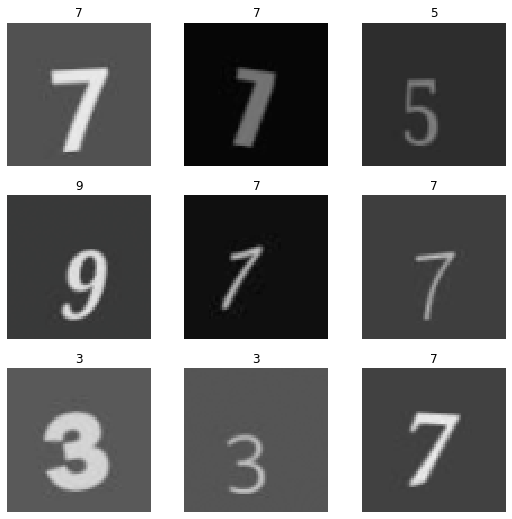

In [5]:
dls.show_batch()

(0.017378008365631102, 0.0020892962347716093)

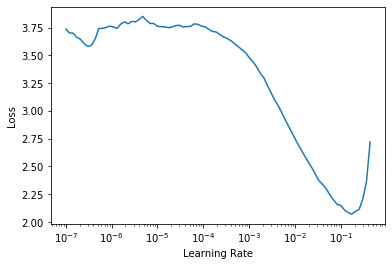

In [6]:
learn = fv.cnn_learner(dls, fv.resnet18, metrics=fv.accuracy)
learn.lr_find()

In [9]:
learn.fit_one_cycle(1, lr_max=3e-3) # this line was run many times before accuracy approached 1

epoch,train_loss,valid_loss,accuracy,time
0,0.076814,0.078480,1.000000,00:04


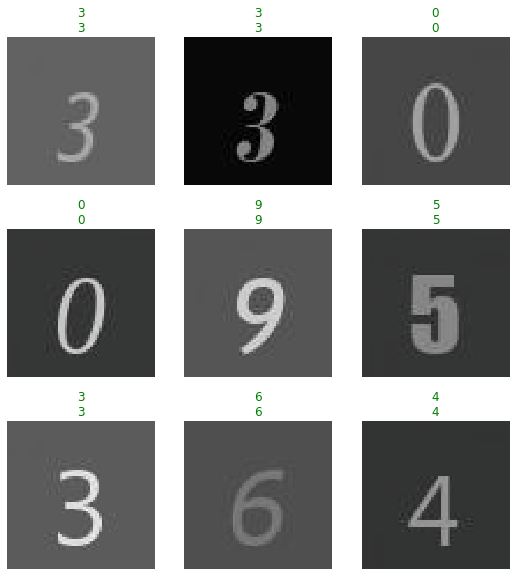

In [10]:
learn.show_results()

In [11]:
learn.save("accuracy1")

In [12]:
learn.export() # move file into models folder manually